In [21]:
# Configure to show multiples outputs from a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import math

In [2]:
with zipfile.ZipFile('Datasets.zip') as ziped_file:
    with ziped_file.open('Datasets/train.csv') as train_file:
        df_train = pd.read_csv(train_file, header=0).set_index('id')
    with ziped_file.open('Datasets/test.csv') as test_file:
        df_test = pd.read_csv(test_file, header=0).set_index('id')
df_target = pd.DataFrame(df_train.pop('target')) # Get the target
df_target.target = pd.Categorical(df_target.target) # Transform target in Categorical type
df_target['categories'] = df_target.target.cat.codes # Add the codes in a columns
df_target.head() # Show target classes
df_train.head() # The train dataset
df_test.head() # It hasn't target

,target,categories
id,,
1,Class_1,0
2,Class_1,0
3,Class_1,0
4,Class_1,0
5,Class_1,0


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
2,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
3,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
5,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


# Tratamento

Será realizada as etapas de feature selection e feature
engineering.
Correlação entre features

Será realizada uma análise da correlação
entre as features. Visto que há um total de 93 colunas que não foi
disponibilizada nenhuma informação sobre o que são elas e o que representam e
portanto, esta análize ajudará a identificar as relações entre as features.

##
Correlação

A correlação entre duas variáveis é quando existe algum laço
matemático que envolve o valor de duas variáveis de alguma forma [ESTATÍSTICA II
- CORRELAÇÃO E
REGRESSÃO](http://www.ctec.ufal.br/professor/mgn/05CorrelacaoERegressao.pdf).
Uma das maneiras mais simples de se identificar a correlação entre duas
variáveis é plotando-as em um gráfico, para tentar identificar alguma relação
entre elas, entretanto, como são um total de 93 features, dificulta visualizar a
correlação em forma gráfica.

A correlação de
[Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de%0
A_Pearson)
mede o grau da correlação (e a direcção dessa correlação - se
positiva ou
negativa) entre duas variáveis de escala métrica (intervalar ou de
rácio/razão).
Já a correlação de
[Spearman](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_
postos_de_Spearman)
entre duas variáveis é igual à correlação de Pearson entre
os valores de postos
daquelas duas variáveis. Enquanto a correlação de Pearson
avalia relações
lineares, a correlação de Spearman avalia relações monótonas,
sejam elas
lineares ou não.

Visto ambos os tipos de correlação, utilizaremos a
de Pearson
para avaliar se há alguma correlação linear crescente ou decrescente
entre as
variáveis, pois esta relação nos possibilita remover uma delas sem
prejuizos aos
modelos de machine learn

In [3]:
shape = (df_train.shape[1], df_train.shape[1])
upper_matrix = np.tril(np.ones(shape)).astype(np.bool)
np.fill_diagonal(upper_matrix, False)
correlation = df_train.corr('pearson').abs().where(upper_matrix)
correlation

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
feat_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_2,0.031332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_3,0.027807,0.082573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_4,0.027529,0.134987,0.583523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_5,0.042973,0.020926,0.010880,1.729026e-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_6,0.043603,0.041343,0.004288,1.405895e-02,0.145355,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_7,0.298952,0.222386,0.001294,1.448981e-02,0.075047,0.088014,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_8,0.056321,0.019815,0.053462,4.618407e-02,0.035861,0.012867,0.038121,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_9,0.032285,0.025630,0.063551,4.624977e-02,0.024708,0.009373,0.027146,0.039281,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_10,0.097776,0.051925,0.036944,5.951396e-02,0.091324,0.041940,0.194258,0.000023,0.024323,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtrando colunas

A partir da matriz de correlação assima, buscamos agora
identificar quais das colunas possuem uma forte correlação de acordo com a
tabela a seguir.
Como sugerido por [Makuka,
2012](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/)
<center>Interpretação do resultado de correlação </center>

|Valor
absoluto|Significado|
|---|---|
|0.9 < v | Muito forte |
|0.7 < v <= 0.9 | Forte
|
|0.5 < v <= 0.7 | Moderada |
|0.3 < v <= 0.5 | Fraca |
|0.0 < v <= 0.3 |
Desprezível |

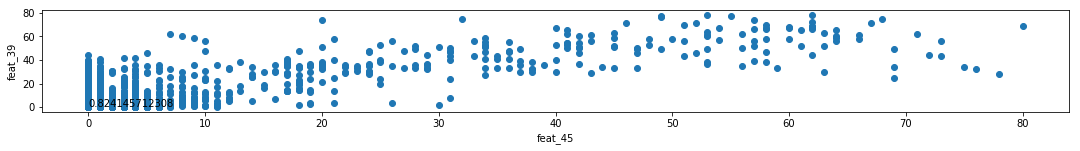

In [4]:
strong_correlation = correlation.where(correlation > 0.8)
strong_correlation = strong_correlation.dropna(how='all', axis=(0,1))
corr_features = strong_correlation[strong_correlation.notnull()].stack().index
corr_features_size = len(corr_features)
if corr_features_size:
    col = math.floor(math.log2(corr_features_size)) or 1
    row = math.ceil(corr_features_size/col)
    figure, axis = plt.subplots(row, col, figsize=[15,2*row])
    figure.tight_layout()
    for idx, (feature1, feature2) in enumerate(corr_features):
        if row == 1: # Has a single element
            plot = axis.scatter(df_train[feature1],df_train[feature2])
            plot = axis.set_xlabel(feature1)
            plot = axis.set_ylabel(feature2)
            plot = axis.annotate(strong_correlation[feature2][feature1],xy=(0,0))
        elif col == 1: # Has multiples elements, but is a array
            plot = axis[idx].scatter(df_train[feature1], df_train[feature2])
            plot = axis[idx].set_xlabel(feature1)
            plot = axis[idx].set_ylabel(feature2)
            plot = axis[idx].annotate(strong_correlation[feature2][feature1],xy=(0,0))
        else: # Multitle elements and is a matrix
            plot = axis[int(idx/col), idx%col].scatter(df_train[feature1], df_train[feature2])
            plot = axis[int(idx/col), idx%col].set_xlabel(feature1)
            plot = axis[int(idx/col), idx%col].set_ylabel(feature2)
            plot = axis[int(idx/col), idx%col].annotate(strong_correlation[feature2][feature1],xy=(0,0))
    plt.show()

## Resultado

A correlação mostra que não há uma fortíssima correlação entre as
features, entretanto, há 10 colunas que estão fortemente correlacionadas. Porem
buscamos uma correlação fortíssima para não remover features com comportamentos
diferentes.

## Train/Test split

Utilizaremos 80% da base de treino para
efetivamente treinar o modelo e 20% para
averiguar a performance do modelo.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 

X = df_train
y = df_target.categories

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature Scaling

In [28]:
sc_X = StandardScaler()
sc_X_train = sc_X.fit_transform(X_train)
sc_X_test = sc_X.transform(X_test)

Feature scaling foi aplicado nos dataframes de **features** e utilizado nos modelos, mas o resultado não apresentou mudança. Os modelos continuaram com exatamente as mesmas performances. 

### Confusion Matrix

Plot para matriz de confusão encontrado em [Scikit](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) e adaptado para o problema

In [88]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
   
    plt.figure(figsize=(11, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Modelo Dummy Classifier

Dummy Classifier é um modelo que faz predições
usando
regras simples.

O dummy é importante para termos como parâmetro de
comparação
com outros modelos.

Confusion matrix, without normalization


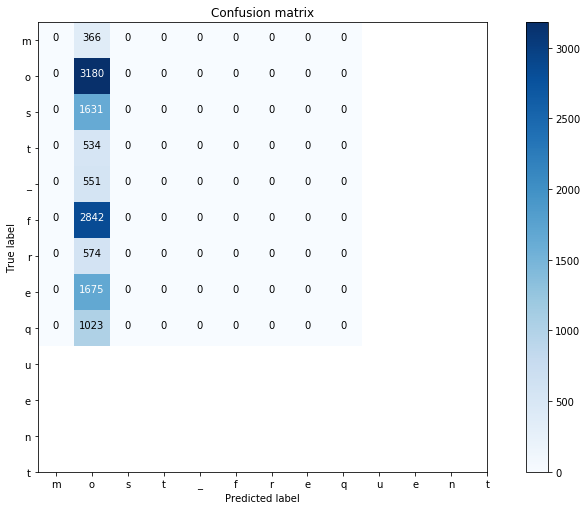

most_frequent train dataset score: 0.26
Média: 0.26
Desvio padrão: 0.0001
Confusion matrix, without normalization


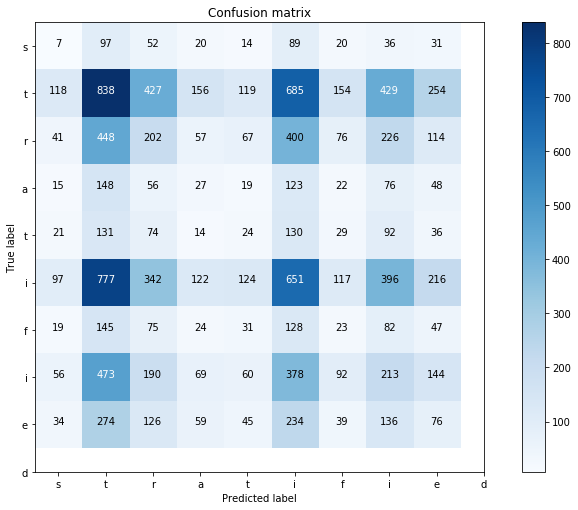

stratified train dataset score: 0.17
Média: 0.17
Desvio padrão: 0.0049


In [92]:
from sklearn.dummy import DummyClassifier

def dummies(X_train, y_train, X_test, y_test):
    models = ['most_frequent', 'stratified']

    for model in models:
        clf = DummyClassifier(strategy=model)
        clf.fit(X_train, y_train)
        score = clf.score(X_train, y_train)
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        plot_confusion_matrix(cm, classes=model)

        # Cross validation
        accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
        print(model, 'train dataset score: %.2f' % score)
        print('Média: %.2f' % accuracies.mean())
        print('Desvio padrão: %.4f' % accuracies.std())

dummies(X_train, y_train, X_test, y_test)

# Gradient Descent

![](http://matthewemery.ca/images/gradient_descent.gif)

## XGBoost

### *eXtreme Gradient Boost*

XGBoost é um algoritmo que implementa
*gradient boosting* de Decision Trees de
forma rápida e com alta performance.
**Gradient Boosting** é uma técnica de *machine learning* para problemas de
regressão e classificação que produz um modelo de predição na forma de
*ensemble* de modelos de predições fracas, normalmente árvores de decisões.

Boosting é um processo sequencial, mas como o `XGBoost` consegue implementá-lo de forma paralela?
Sabemos que cada árvore pode ser produzida apenas depois que produzida a árvore anterior, mas o processo de criar as árvores pode ser paralelizado utilizando todos os núcleos a disposição. 

Confusion matrix, without normalization


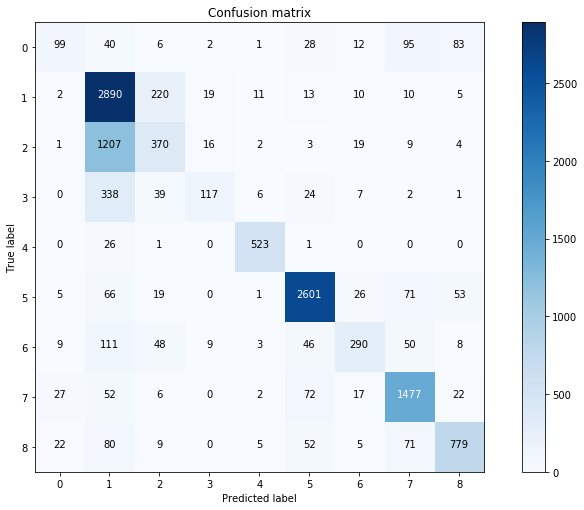

Resultado na base de treino 0.75
Resultado Médio na base de teste: 0.74
Desvio padrão: 0.0049
CPU times: user 56min 43s, sys: 2.84 s, total: 56min 46s
Wall time: 7min 20s


In [94]:
%%time
from xgboost import XGBClassifier

def xgboost(X_train, y_train, X_test, y_test):    
    xgbclf = XGBClassifier(
        learning_rate=0.01,
        n_estimators=140,
        max_depth=4,
        min_child_weight=6,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        nthread=8,
        scale_pos_weight=1
        )
    
    xgbclf.fit(X_train, y_train)
    train_score = xgbclf.score(X_train, y_train)
    y_pred = xgbclf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    
    plot_confusion_matrix(cm, classes=xgbclf)

    accuracies = cross_val_score(estimator=xgbclf, X=X_train, y=y_train, cv=10)
    print('Resultado na base de treino %.2f' % train_score)
    print('Resultado Médio na base de teste: %.2f' % accuracies.mean())
    print('Desvio padrão: %.4f' % accuracies.std())
    
xgboost(X_train, y_train, X_test, y_test)

## GridSearchCV
A ferramenta GridSearch disponibilizada pelo Scikit, gera de
forma exaustiva candidatos a partir de um grid de  parâmetros especificados com
o atributo param_grid.

In [11]:
dt_params = [{
    'max_depth': [40, 50, 60, 80, 100, 120],
    'max_features': [70, 80, 90, 92],
    'min_samples_leaf': [2, 5, 10, 20, 30, 40]
}]

xgb_params = [{
    'max_depth': [4, 5, 6],
    'min_child_weight': [4, 5, 6]
}]

xgb_add_params = [{
    'learning_rate': 0.1, 
    'n_estimators': 140, 
    'max_depth': 5,
    'min_child_weight': 2, 
    'gamma': 0, 
    'subsample': 0.8, 
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic', 
    'nthread': 8, 
    'scale_pos_weight': 1,
    'seed': 27
}]

In [17]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def search_params(classifier, params):
    clf = classifier()
    grid_search = GridSearchCV(estimator=clf,
                              param_grid=params,
                              cv = 10,
                              n_jobs=-1)
    
    grid_search = grid_search.fit(X_train, y_train)
    print(grid_search.best_score_, grid_search.best_params_)
    return grid_search.best_score_

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 18.6 µs


### Aplicando GridSearchCV ao XGBClassifier:

In [ ]:
%%time
from xgboost import XGBClassifier

# Takes long time to run
search_params(XGBClassifier, xgb_params)

Aplicando GridSearchCV ao Decision Tree Classifier:

In [ ]:
search_params(DecisionTreeClassifier, dt_params)

## Decision Tree

### Adicionar descrição de como funciona!!!!

In [26]:
from sklearn.model_selection import cross_val_score

def fit_tree(X, Y):
    tree_classifier = DecisionTreeClassifier(max_features=70, min_samples_leaf=10, max_depth=40)
    tree_classifier.fit(X, Y)
    
    inner_score = tree_classifier.score(X, Y)
    tree_fit = cross_val_score(tree_classifier, X, Y)
    
    return inner_score, tree_fit.mean(), tree_fit.std()

"inner: {:.2f} cross: {:.2f} +/- {:.2f}".format(*fit_tree(X_train, y_train))

'inner: 0.80 cross: 0.71 +/- 0.00'

## Distribuição dos dados

Um dos modelos a ser utilizado será o decision tree
no método de montagem random forest. Este modelo de predição possui um problema
de viés quando uma das classes na base de treino é mais predominante do que
outra, ou seja, a distribuição das classes na base de treino devem ser
semelhantes para evitar problemas de
[overfiting](http://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-
underfitting-vs-overfitting.html).

Para tanto, precisa-se descobrir qual a
contagem de cada classe disponível na base de treino, montaremos um histograma
para verificar a diferença entre elas.

In [25]:
counts = [0] *len(df_target.target.cat.categories)

def reduce(target):
    counts[target.categories] += 1
    return counts[target.categories]

df_target['increase_count'] = df_target.apply(reduce, axis=1)
df_target.groupby('target').count()
df_target.groupby('target')['increase_count'].max().sum() == df_target.target.count()

,categories,increase_count
target,,
Class_1,1929,1929
Class_2,16122,16122
Class_3,8004,8004
Class_4,2691,2691
Class_5,2739,2739
Class_6,14135,14135
Class_7,2839,2839
Class_8,8464,8464
Class_9,4955,4955


True

### Filtrar dados

Agora, iremos filtrar os dados deixando apenas os primeiros
registros. O critério de filtrar os dados será pegar a classe que possue o menor
número e utilizar ele como base para remover os demais, considerando um tamanho
máximo de até 2x o da menor classe

In [31]:
distance_percent = 2
minimum_value = df_target.groupby('target')['increase_count'].max().min()
df_rtarget = df_target[ df_target.increase_count < minimum_value*distance_percent ]
df_rtarget.groupby('target').count()
df_rtrain = df_train.drop( df_target[df_target.increase_count >= minimum_value * distance_percent].index )
df_rtrain.shape[0] == df_rtarget.shape[0]

,categories,increase_count
target,,
Class_1,1929,1929
Class_2,3857,3857
Class_3,3857,3857
Class_4,2691,2691
Class_5,2739,2739
Class_6,3857,3857
Class_7,2839,2839
Class_8,3857,3857
Class_9,3857,3857


True

### Verificando resultado

Após aplicar uma melhor distribuição nos dados,
rodou-se novamene o algorítmo da decision tree e percebeu-se que a acurácia do
modelo diminuiu, e portanto, não será utilizado.

In [30]:
"inner: {:.2f} cross: {:.2f} +/- {:.2f}".format(*fit_tree(df_rtrain, df_rtarget.target))

'inner: 0.77 cross: 0.66 +/- 0.01'

# Random Forest

Breiman breiman, 2001, descreve Random Forests como uma
evolução das decisions
trees, onde várias ávores são formadas para criar um
modelo com maior precisão.
Isto é feito a partir da separação dos Dados em
conjutos
de dados menores e aleatórios. Cada árvore é contruida a partir de um
pedaço
aleatório dos dados. Quando um novo dado chega, a predição é feita por
todas as
Árvores e ao fim é feita uma
votação por maioria, ou seja, a categoria
com mais votos ganha e o resultado é
dado.

![Workflow Random
forest](forest.jpg)

De acordo com breiman, 2001, as RFs corrigem a maior parte
dos problemas de
Overfitting que as Árvores de decisão apresentam. Tudo depende
do quanto as DT
contidas dentro da Random Forest. Isto é, o quanto elas
representam os dados.

Referências:
[BREIMAN](https://www.stat.berkeley.edu/users/breiman/randomforest2001.pdf),
Leo. Random forests. Machine learning, v. 45, n. 1, p. 5-32, 2001.

## Utilizando o algoritmo

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=10, max_features=70, min_samples_leaf=10, max_depth=40)
rfclf = rfclf.fit(X_train, y_train)

train_score = rfclf.score(X_train, y_train)
test_score = cross_val_score(rfclf, X_train, y_train)

train_score
test_score

0.83925901983758233

array([ 0.76502666,  0.76631719,  0.75862278])

## Importancia das features para a RF

A seguir vemos quais as influências de
cada uma das features para o uso no random forest. Quanto maior no gráfico,
maior é a importância da feature.

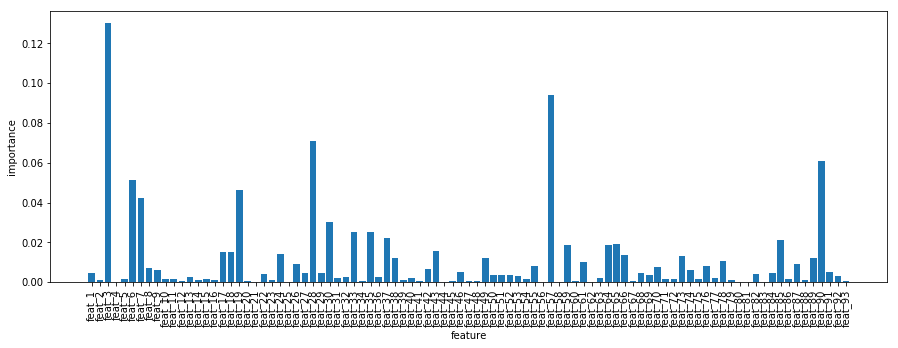

In [34]:
fig, axis = plt.subplots(figsize=(15, 5))
plot = axis.bar(df_train.columns, rfclf.feature_importances_)
plot = axis.set_xticklabels(df_train.columns.values, rotation='vertical')
plot = axis.set_xlabel('feature')
plot = axis.set_ylabel('importance')
plt.show()

## Verificando a acurácia com os dados de treinamento

Utilizando os dados que
foram utilizados parar treinar o algoritmo como entrada
para predição nos dá
noção se o modelo pode estar viciado.

In [35]:
print ("{} de precisão".format(rfclf.score(X_train, y_train) * 100))

83.92590198375824 de precisão


## Verificando com Cross Validation

Cross validation irá predizer um pedaço do
dataset utilizando o modelo treinado
com o resto dos dados que não fazem parte
deste dataset.

In [36]:
rfscores = cross_val_score(rfclf, X_train, y_train)
print ("{} de precisão".format(rfscores.mean() * 100))


76.13427606387503 de precisão


## ExtraTrees

O [Scikit Learn](http://scikit-
learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
nos apresenta um tipo diferente de random forest que pode apresentar resultados
melhores que o [RandomForestClassifier](http://scikit-
learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier();
etscores = cross_val_score(rfclf, X_train, y_train)
extra_tree_fit = etc.fit(X_train, y_train)
print ("{} de precisão".format((etscores.mean() * 100)))
print(extra_tree_fit.score(X_train, y_train))

76.14231022665767 de precisão
1.0


## Boosting Trees

Este algorítmo demora demais para rodar, descomente se tiver
a paciencia de
esperar.
Estimativa: 10 min com I7 3.1  8Ram

In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier

#gbc = GradientBoostingClassifier();
#gbcscores = cross_val_score(gbc, df_train, y)

In [ ]:
#print (gbcscores.mean() * 100, end='')
#print ("%")

# Referências Bibliográficas
http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/